In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sklearn
import numpy as np
from transformers import LayoutLMv3FeatureExtractor 
from PIL import Image
import glob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import altair as alt

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [3]:
df = pd.read_csv(r'hotel_final.csv')
#df2= df.groupby(["rating"]).count()
#df2
df.head(5)

,Unnamed: 0,reviewID,reviewContent,rating,usefulCount,coolCount,funnyCount
0,2982,-ZkzDLAp-6LSdek-nU,My husband took me to stay the night for a fun...,4,0,0,0
1,2983,9yStfyRS5CISu-May43dmA,"stayed at the property over the weekend, got a...",3,0,0,0
2,2984,Wf-7bJszS2n6REXGbrwK2w,"Overall, I think I'm less and less a fan of th...",3,0,0,0
3,2985,ZLe,I'd like to make a confession. I don't really ...,3,21,11,16
4,2986,vURf9AGmThDrRC9TVcQrdw,The good: the view; location The bad: servic...,1,0,0,0


In [4]:
me = pd.DataFrame(df["reviewContent"],
                 columns=["reviewContent"])

In [5]:
def process_text(t):
    import re
    
    t = t.lower()
    t = re.sub(r"http\S+", "", t)      # remove links (anything that doesn't have a space after http)
    t = re.sub(r"www.\S+", "", t)      # remove links
    t = re.sub("[^a-z]", " ", t)
    return t

In [7]:
# Apply process_text function to raw_text column
df["clean_text"] = df["reviewContent"].apply(process_text)

In [8]:
df.head(5)

,Unnamed: 0,reviewID,reviewContent,rating,usefulCount,coolCount,funnyCount,clean_text
0,2982,-ZkzDLAp-6LSdek-nU,My husband took me to stay the night for a fun...,4,0,0,0,my husband took me to stay the night for a fun...
1,2983,9yStfyRS5CISu-May43dmA,"stayed at the property over the weekend, got a...",3,0,0,0,stayed at the property over the weekend got a...
2,2984,Wf-7bJszS2n6REXGbrwK2w,"Overall, I think I'm less and less a fan of th...",3,0,0,0,overall i think i m less and less a fan of th...
3,2985,ZLe,I'd like to make a confession. I don't really ...,3,21,11,16,i d like to make a confession i don t really ...
4,2986,vURf9AGmThDrRC9TVcQrdw,The good: the view; location The bad: servic...,1,0,0,0,the good the view location the bad servic...


In [11]:
dfsmall = pd.DataFrame(df,
                 columns=["clean_text"])
#dfsmall = pd.DataFrame({"clean_text":" ".join(df["clean_text"])},
 #                index=[0])
wc = WordCloud().generate(dfsmall["clean_text"].to_string())

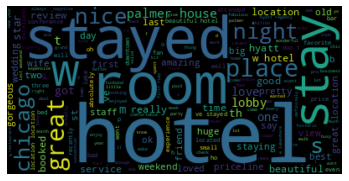

In [12]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
df['type'] = np.where(df['rating']== 1, "Low", 
                      np.where(df['rating']== 2, "Low", 
                               np.where(df['rating']== 4, "High",
                                        np.where(df['rating']== 5, "High", "Medium"))))
df 



,Unnamed: 0,reviewID,reviewContent,rating,usefulCount,coolCount,funnyCount,clean_text,type
0,2982,-ZkzDLAp-6LSdek-nU,My husband took me to stay the night for a fun...,4,0,0,0,my husband took me to stay the night for a fun...,High
1,2983,9yStfyRS5CISu-May43dmA,"stayed at the property over the weekend, got a...",3,0,0,0,stayed at the property over the weekend got a...,Medium
2,2984,Wf-7bJszS2n6REXGbrwK2w,"Overall, I think I'm less and less a fan of th...",3,0,0,0,overall i think i m less and less a fan of th...,Medium
3,2985,ZLe,I'd like to make a confession. I don't really ...,3,21,11,16,i d like to make a confession i don t really ...,Medium
4,2986,vURf9AGmThDrRC9TVcQrdw,The good: the view; location The bad: servic...,1,0,0,0,the good the view location the bad servic...,Low
...,...,...,...,...,...,...,...,...,...
944,662254,_xRi_iGcxGf6dX1F_mmyyQ,Out stay at the W chicago was amazing..they ha...,4,2,0,0,out stay at the w chicago was amazing they ha...,High
945,662400,6_TJOoDQwOYRBlsqu6SoaQ,I stayed at this hotel back in March for a lon...,4,1,1,1,i stayed at this hotel back in march for a lon...,High
946,663103,_5mDKj1Q91zlnEEjeEIvtg,I came here a couple years ago for a romantic ...,5,1,1,0,i came here a couple years ago for a romantic ...,High
947,675604,b_GInNncfXXZNaThf_jO1w,Just stayed 2 nights here. It seems like it i...,4,0,0,0,just stayed nights here it seems like it i...,High


In [15]:
# selecting rows based on condition 
low_df = df.loc[(df['type'] == 'Low')]
high_df = df.loc[(df['type'] == 'High')]
             #    ) & dataframe['Stream'].isin(options)] 

In [18]:
# All text from site as one row of data (one "document")
onedf = pd.DataFrame({"clean_text":" ".join(high_df["clean_text"])},
                           index=[0])



# 1 Instantiates a vectorizer to vectorize the text (extract features) based on ngram parameters we specify
v = CountVectorizer(stop_words="english",
                    ngram_range=(1, 1))
    
# 2 Vectorizes the text, creates a dataframe with terms and frequencies
dtm = v.fit_transform(onedf["clean_text"])
    
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

# Transpose dataframe
dtm_df = dtm_df.T

# Reset index, replace column names with term and freq
dtm_df.reset_index(inplace=True)
dtm_df.columns = ["term", "freq"]
dtm_df= dtm_df.sort_values(by="freq", ascending=False)

alt.Chart(dtm_df.head(15)).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)

In [19]:
# All text from site as one row of data (one "document")
onedf = pd.DataFrame({"clean_text":" ".join(low_df["clean_text"])},
                           index=[0])



# 1 Instantiates a vectorizer to vectorize the text (extract features) based on ngram parameters we specify
v = CountVectorizer(stop_words="english",
                    ngram_range=(1, 1))
    
# 2 Vectorizes the text, creates a dataframe with terms and frequencies
dtm = v.fit_transform(onedf["clean_text"])
    
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

# Transpose dataframe
dtm_df = dtm_df.T

# Reset index, replace column names with term and freq
dtm_df.reset_index(inplace=True)
dtm_df.columns = ["term", "freq"]
dtm_df= dtm_df.sort_values(by="freq", ascending=False)

alt.Chart(dtm_df.head(15)).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)